In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df_rfm=pd.read_csv('RFM data.csv')
df_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
df_gb_id=df_rfm.groupby(['CustomerID']).agg({'InvoiceDate':'max','CustomerID':'count','TotalPrice':'sum'})

In [6]:
df_gb_id.head()

,InvoiceDate,CustomerID,TotalPrice
CustomerID,,,
12347.0,2011-12-07 15:52:00,181,4060.40
12348.0,2011-09-25 13:13:00,27,1437.24
12349.0,2011-11-21 09:51:00,71,1417.60
12350.0,2011-02-02 16:01:00,16,294.40
12352.0,2011-11-03 14:37:00,77,1385.74


In [7]:
df_gb_id['InvoiceDate'] = pd.to_datetime(df_gb_id['InvoiceDate'])
df_gb_id['Recency'] = (df_gb_id['InvoiceDate'].max() - df_gb_id['InvoiceDate']).dt.days
df_gb_id.head()

,InvoiceDate,CustomerID,TotalPrice,Recency
CustomerID,,,,
12347.0,2011-12-07 15:52:00,181,4060.40,1
12348.0,2011-09-25 13:13:00,27,1437.24,74
12349.0,2011-11-21 09:51:00,71,1417.60,18
12350.0,2011-02-02 16:01:00,16,294.40,309
12352.0,2011-11-03 14:37:00,77,1385.74,35


In [8]:
df_gb_id['Recency_Scale']=np.where(df_gb_id['Recency']<=30,1,np.where(df_gb_id['Recency']<=60,2,np.where(df_gb_id['Recency']<=90,3,np.where(df_gb_id['Recency']<=180,4,5))))
df_gb_id.head()

,InvoiceDate,CustomerID,TotalPrice,Recency,Recency_Scale
CustomerID,,,,,
12347.0,2011-12-07 15:52:00,181,4060.40,1,1
12348.0,2011-09-25 13:13:00,27,1437.24,74,3
12349.0,2011-11-21 09:51:00,71,1417.60,18,1
12350.0,2011-02-02 16:01:00,16,294.40,309,5
12352.0,2011-11-03 14:37:00,77,1385.74,35,2


In [9]:
df_gb_id.sort_values(by='Recency_Scale',ascending=True)

,InvoiceDate,CustomerID,TotalPrice,Recency,Recency_Scale
CustomerID,,,,,
12347.0,2011-12-07 15:52:00,181,4060.40,1,1
15373.0,2011-12-01 15:05:00,130,2364.96,7,1
15380.0,2011-12-01 12:13:00,36,1690.26,8,1
15382.0,2011-11-25 10:58:00,302,5955.71,14,1
15392.0,2011-12-05 11:01:00,84,1535.53,4,1
...,...,...,...,...,...
15119.0,2011-04-08 09:08:00,13,226.45,245,5
16976.0,2011-03-17 16:33:00,2,251.52,266,5
13508.0,2011-04-10 11:58:00,12,110.97,243,5


In [10]:
df_gb_id['Frequency_Scale']=np.where(df_gb_id['CustomerID']>=5000,1,np.where(df_gb_id['CustomerID']>=2000,2,np.where(df_gb_id['CustomerID']>=1000,3,np.where(df_gb_id['CustomerID']>=500,4,5))))

In [11]:
df_gb_id

,InvoiceDate,CustomerID,TotalPrice,Recency,Recency_Scale,Frequency_Scale
CustomerID,,,,,,
12347.0,2011-12-07 15:52:00,181,4060.40,1,1,5
12348.0,2011-09-25 13:13:00,27,1437.24,74,3,5
12349.0,2011-11-21 09:51:00,71,1417.60,18,1,5
12350.0,2011-02-02 16:01:00,16,294.40,309,5,5
12352.0,2011-11-03 14:37:00,77,1385.74,35,2,5
...,...,...,...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60,277,5,5
18281.0,2011-06-12 10:53:00,7,80.82,180,4,5
18282.0,2011-12-02 11:43:00,12,178.05,7,1,5


In [12]:
df_gb_id['TotalPrice'].describe()

count      4298.000000
mean       1667.299565
std        5336.659297
min           2.900000
25%         294.940000
50%         643.555000
75%        1568.095000
max      189796.000000
Name: TotalPrice, dtype: float64

In [13]:
df_gb_id[df_gb_id['TotalPrice']>=50000]

,InvoiceDate,CustomerID,TotalPrice,Recency,Recency_Scale,Frequency_Scale
CustomerID,,,,,,
12415.0,2011-11-15 10:32:00,575,81455.09,24,1,4
13089.0,2011-12-07 09:02:00,1808,56618.82,2,1,3
14096.0,2011-12-05 17:17:00,5062,52147.65,3,1,1
14156.0,2011-11-30 10:54:00,1296,81329.92,9,1,3
14646.0,2011-12-08 12:12:00,1764,189796.00,1,1,3
14911.0,2011-12-08 15:54:00,5542,129795.43,0,1,1
15311.0,2011-12-09 12:00:00,2361,57178.46,0,1,2
17511.0,2011-12-07 10:12:00,902,78595.72,2,1,4
18102.0,2011-12-09 11:50:00,293,80619.70,0,1,5


In [14]:
df_gb_id['Monetary_Scale']=np.where(df_gb_id['TotalPrice']>=50000,1,np.where(df_gb_id['TotalPrice']>=20000,2,np.where(df_gb_id['TotalPrice']>=10000,3,np.where(df_gb_id['TotalPrice']>=5000,4,5))))
df_gb_id

,InvoiceDate,CustomerID,TotalPrice,Recency,Recency_Scale,Frequency_Scale,Monetary_Scale
CustomerID,,,,,,,
12347.0,2011-12-07 15:52:00,181,4060.40,1,1,5,5
12348.0,2011-09-25 13:13:00,27,1437.24,74,3,5,5
12349.0,2011-11-21 09:51:00,71,1417.60,18,1,5,5
12350.0,2011-02-02 16:01:00,16,294.40,309,5,5,5
12352.0,2011-11-03 14:37:00,77,1385.74,35,2,5,5
...,...,...,...,...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60,277,5,5,5
18281.0,2011-06-12 10:53:00,7,80.82,180,4,5,5
18282.0,2011-12-02 11:43:00,12,178.05,7,1,5,5


In [15]:
df_gb_id['RFM_Scale']=df_gb_id['Recency_Scale']+df_gb_id['Frequency_Scale']+df_gb_id['Monetary_Scale']

In [16]:
df_gb_id

,InvoiceDate,CustomerID,TotalPrice,Recency,Recency_Scale,Frequency_Scale,Monetary_Scale,RFM_Scale
CustomerID,,,,,,,,
12347.0,2011-12-07 15:52:00,181,4060.40,1,1,5,5,11
12348.0,2011-09-25 13:13:00,27,1437.24,74,3,5,5,13
12349.0,2011-11-21 09:51:00,71,1417.60,18,1,5,5,11
12350.0,2011-02-02 16:01:00,16,294.40,309,5,5,5,15
12352.0,2011-11-03 14:37:00,77,1385.74,35,2,5,5,12
...,...,...,...,...,...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60,277,5,5,5,15
18281.0,2011-06-12 10:53:00,7,80.82,180,4,5,5,14
18282.0,2011-12-02 11:43:00,12,178.05,7,1,5,5,11


In [17]:
df_gb_id['Rank_Recency']=df_gb_id['Recency_Scale'].rank(method='dense',ascending=False)
df_gb_id

,InvoiceDate,CustomerID,TotalPrice,Recency,Recency_Scale,Frequency_Scale,Monetary_Scale,RFM_Scale,Rank_Recency
CustomerID,,,,,,,,,
12347.0,2011-12-07 15:52:00,181,4060.40,1,1,5,5,11,5.0
12348.0,2011-09-25 13:13:00,27,1437.24,74,3,5,5,13,3.0
12349.0,2011-11-21 09:51:00,71,1417.60,18,1,5,5,11,5.0
12350.0,2011-02-02 16:01:00,16,294.40,309,5,5,5,15,1.0
12352.0,2011-11-03 14:37:00,77,1385.74,35,2,5,5,12,4.0
...,...,...,...,...,...,...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60,277,5,5,5,15,1.0
18281.0,2011-06-12 10:53:00,7,80.82,180,4,5,5,14,2.0
18282.0,2011-12-02 11:43:00,12,178.05,7,1,5,5,11,5.0


In [18]:
df_gb_id['Rank_Frequency']=df_gb_id['Frequency_Scale'].rank(method='dense',ascending=False)
df_gb_id['Rank_Monetary']=df_gb_id['Monetary_Scale'].rank(method='dense',ascending=False)
df_gb_id

,InvoiceDate,CustomerID,TotalPrice,Recency,Recency_Scale,Frequency_Scale,Monetary_Scale,RFM_Scale,Rank_Recency,Rank_Frequency,Rank_Monetary
CustomerID,,,,,,,,,,,
12347.0,2011-12-07 15:52:00,181,4060.40,1,1,5,5,11,5.0,1.0,1.0
12348.0,2011-09-25 13:13:00,27,1437.24,74,3,5,5,13,3.0,1.0,1.0
12349.0,2011-11-21 09:51:00,71,1417.60,18,1,5,5,11,5.0,1.0,1.0
12350.0,2011-02-02 16:01:00,16,294.40,309,5,5,5,15,1.0,1.0,1.0
12352.0,2011-11-03 14:37:00,77,1385.74,35,2,5,5,12,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60,277,5,5,5,15,1.0,1.0,1.0
18281.0,2011-06-12 10:53:00,7,80.82,180,4,5,5,14,2.0,1.0,1.0
18282.0,2011-12-02 11:43:00,12,178.05,7,1,5,5,11,5.0,1.0,1.0


In [19]:
df_gb_id['Segments'] = np.where(
    (df_gb_id['Rank_Recency'] >= 4) &
    (df_gb_id['Rank_Frequency'] >= 4) &
    (df_gb_id['Rank_Monetary'] >= 4), 'Champions',
    np.where(
        (df_gb_id['Rank_Recency'] >= 3) &
        (df_gb_id['Rank_Recency'] <= 5) &
        (df_gb_id['Rank_Frequency'] >= 3) &
        (df_gb_id['Rank_Frequency'] <= 5) &
        (df_gb_id['Rank_Monetary'] >= 3) &
        (df_gb_id['Rank_Monetary'] <= 5), 'Loyal customers',
        np.where(
            (df_gb_id['Rank_Recency'] >= 4) &
            (df_gb_id['Rank_Recency'] <= 5) &
            (df_gb_id['Rank_Frequency'] >= 2) &
            (df_gb_id['Rank_Frequency'] <= 3) &
            (df_gb_id['Rank_Monetary'] >= 2) &
            (df_gb_id['Rank_Monetary'] <= 3), 'Potential loyalist',
            np.where(
                (df_gb_id['Rank_Recency'] >= 4) &
                (df_gb_id['Rank_Recency'] <= 5) &
                (df_gb_id['Rank_Frequency'] >= 1) &
                (df_gb_id['Rank_Frequency'] <= 2) &
                (df_gb_id['Rank_Monetary'] >= 1) &
                (df_gb_id['Rank_Monetary'] <= 2), 'Recent customers',
                np.where(
                    (df_gb_id['Rank_Recency'] >= 4) &
                    (df_gb_id['Rank_Recency'] <= 5) &
                    (df_gb_id['Rank_Frequency'] >= 1) &
                    (df_gb_id['Rank_Frequency'] <= 2) &
                    (df_gb_id['Rank_Monetary'] >= 1) &
                    (df_gb_id['Rank_Monetary'] <= 2), 'Promising',
                    np.where(
                        (df_gb_id['Rank_Recency'] >= 3) &
                        (df_gb_id['Rank_Recency'] <= 5) &
                        (df_gb_id['Rank_Frequency'] >= 3) &
                        (df_gb_id['Rank_Frequency'] <= 5) &
                        (df_gb_id['Rank_Monetary'] >= 3) &
                        (df_gb_id['Rank_Monetary'] <= 5), 'Needs attention',
                        np.where(
                            (df_gb_id['Rank_Recency'] >= 1) &
                            (df_gb_id['Rank_Recency'] <= 2) &
                            (df_gb_id['Rank_Frequency'] >= 1) &
                            (df_gb_id['Rank_Frequency'] <= 2) &
                            (df_gb_id['Rank_Monetary'] >= 1) &
                            (df_gb_id['Rank_Monetary'] <= 2), 'About to sleep',
                            np.where(
                                (df_gb_id['Rank_Recency'] >= 2) &
                                (df_gb_id['Rank_Recency'] <= 5) &
                                (df_gb_id['Rank_Frequency'] >= 1) &
                                (df_gb_id['Rank_Frequency'] <= 3) &
                                (df_gb_id['Rank_Monetary'] >= 1) &
                                (df_gb_id['Rank_Monetary'] <= 3), 'At risk',
                                np.where(
                                    (df_gb_id['Rank_Recency'] >= 1) &
                                    (df_gb_id['Rank_Recency'] <= 3) &
                                    (df_gb_id['Rank_Frequency'] >= 4) &
                                    (df_gb_id['Rank_Frequency'] <= 5) &
                                    (df_gb_id['Rank_Monetary'] >= 4) &
                                    (df_gb_id['Rank_Monetary'] <= 5), 'Can\'t lose them',
                                    'Hibernating'
                                )
                            )
                        )
                    )
                )
            )
        )
    )
)


In [20]:
df_gb_id

,InvoiceDate,CustomerID,TotalPrice,Recency,Recency_Scale,Frequency_Scale,Monetary_Scale,RFM_Scale,Rank_Recency,Rank_Frequency,Rank_Monetary,Segments
CustomerID,,,,,,,,,,,,
12347.0,2011-12-07 15:52:00,181,4060.40,1,1,5,5,11,5.0,1.0,1.0,Recent customers
12348.0,2011-09-25 13:13:00,27,1437.24,74,3,5,5,13,3.0,1.0,1.0,At risk
12349.0,2011-11-21 09:51:00,71,1417.60,18,1,5,5,11,5.0,1.0,1.0,Recent customers
12350.0,2011-02-02 16:01:00,16,294.40,309,5,5,5,15,1.0,1.0,1.0,About to sleep
12352.0,2011-11-03 14:37:00,77,1385.74,35,2,5,5,12,4.0,1.0,1.0,Recent customers
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60,277,5,5,5,15,1.0,1.0,1.0,About to sleep
18281.0,2011-06-12 10:53:00,7,80.82,180,4,5,5,14,2.0,1.0,1.0,About to sleep
18282.0,2011-12-02 11:43:00,12,178.05,7,1,5,5,11,5.0,1.0,1.0,Recent customers


In [21]:
df_gb_id['Segments'].value_counts()

Segments
Recent customers      2298
About to sleep        1429
At risk                512
Potential loyalist      29
Hibernating             17
Loyal customers          8
Champions                5
Name: count, dtype: int64

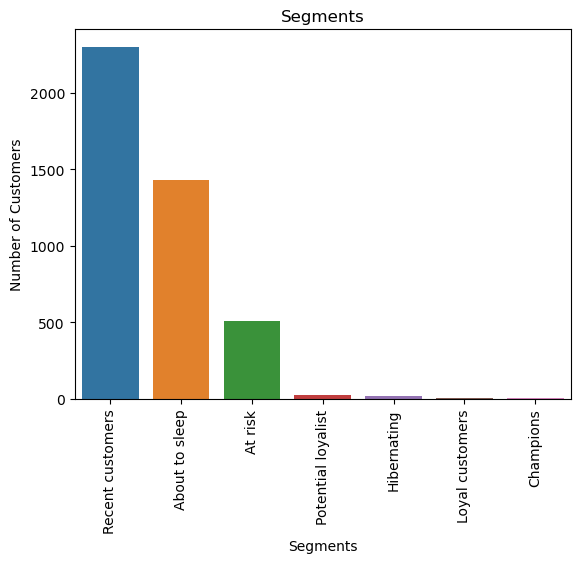

In [22]:
sns.barplot(x=df_gb_id['Segments'].value_counts().index,y=df_gb_id['Segments'].value_counts())
plt.xticks(rotation=90)
plt.title('Segments')
plt.ylabel('Number of Customers')
plt.xlabel('Segments')
plt.show()

The RFM analysis reveals a large number of recent and about-to-sleep customers, with very few champions and loyal customers. To improve retention and revenue, focus on re-engagement and nurturing strategies for at-risk and dormant segments, while rewarding and leveraging the insights from your loyal and champion customers. Prioritize converting potential loyalists into regular customers through targeted offers and personalized engagement.